### mecab 설치

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-11-27 23:34:47--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-11-27 23:34:47--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucab62437c1bf17c3129e6139593.dl.dropboxusercontent.com/cd/0/get/BxmBE5V_UGCoDmXP_lfMoG6DwHNGjxVEaPuG73GMm5HIfYj7Fre-65ntcG32xG_pnI4ui3cT9kw9SwfnrR-fvPHW1ZYhNfYPaPgtXOQy0_O0iMeuJzKdYy1Asgi7F0G88qy9eqs_LyqHR2tzivq7l7e54KgCn_Cb6D-eyqGSrqKadFWG9Jfqw2qy9x5_NkSOtEo/file?dl=1# [following]
--2022-11-27 23:34:48--  https://ucab62437c1bf17c3129e6139593.dl.dropboxusercontent.com/cd/0/get/BxmBE5V_U

In [3]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab.morphs('안녕하세용')

['안녕', '하세용']

In [4]:
#tokenizer.word_counts

In [5]:
"""
tokenizer1 = Tokenizer()
tokenizer2 = Tokenizer()
tokenizer3 = Tokenizer()
tokenizer1.fit_on_texts(voice_noun_join)
tokenizer2.fit_on_texts(impersonation_noun_join)
tokenizer3.fit_on_texts(fraud_noun_join)
voice_count_desc = sorted(tokenizer1.word_counts, key = lambda x : x[1], reverse = True)
impersonation_count_desc = sorted(tokenizer2.word_counts, key = lambda x : x[1], reverse = True)
fraud_count_desc = sorted(tokenizer3.word_counts, key = lambda x : x[1], reverse = True)
"""

'\ntokenizer1 = Tokenizer()\ntokenizer2 = Tokenizer()\ntokenizer3 = Tokenizer()\ntokenizer1.fit_on_texts(voice_noun_join)\ntokenizer2.fit_on_texts(impersonation_noun_join)\ntokenizer3.fit_on_texts(fraud_noun_join)\nvoice_count_desc = sorted(tokenizer1.word_counts, key = lambda x : x[1], reverse = True)\nimpersonation_count_desc = sorted(tokenizer2.word_counts, key = lambda x : x[1], reverse = True)\nfraud_count_desc = sorted(tokenizer3.word_counts, key = lambda x : x[1], reverse = True)\n'

In [6]:
# 데이터 불러오기
"""
with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/그놈목소리.txt', 'r', encoding='UTF8') as f :
  voice = f.readlines()
with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/수사기관사칭.txt', 'r', encoding='UTF8') as f :
  impersonation = f.readlines()
with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/은행사기.txt', 'r', encoding='UTF8') as f :
  fraud = f.readlines()

print(voice[:2])
print(impersonation[:2])
print(fraud[:2])
"""

"\nwith open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/그놈목소리.txt', 'r', encoding='UTF8') as f :\n  voice = f.readlines()\nwith open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/수사기관사칭.txt', 'r', encoding='UTF8') as f :\n  impersonation = f.readlines()\nwith open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/은행사기.txt', 'r', encoding='UTF8') as f :\n  fraud = f.readlines()\n\nprint(voice[:2])\nprint(impersonation[:2])\nprint(fraud[:2])\n"

### 키워드 정의, 데이터 전처리, 합성

In [7]:
keywords = list(set(['대포통장', '명의도용', '개인정보유출', '금융범죄', '수사관', '동결', '서울중앙지검', '신용카드', '피해자', '녹취',
            '방해죄', '해킹', '재판부', '고소', '재판', '수수료', '사기', '검찰', '체포영장', '신분증개설', '도난', '검찰청', '집행', '압수수색',
            '변호사', '피의자', '거래법', '개설', '보안', '영업', '경찰청', '검찰', 
            '수수료', '신용', '신용도', '입금',
            '금융', '저축', '은행', '대출', '상품', '수수료', '원리금', '분할', '상환', '만기', 
            '증명서', '고객', '자금', '신용', '통장', '캐피탈', '금리', '대출금', '한도', '담보']))

In [8]:
import random
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/all_df_with_tokens_according_to_topic.csv')
df.head()

,Unnamed: 0,sentence,tokens,cityCode,convrsThema,gender,age
0,0,밥 한끼를 제대로 된 밥 한끼를 먹을 수 있다고 생각하면서 감사하게 감사하게 생각하...,밥 끼 제대로 밥 끼 수 생각 생각 노후 제 가장 연예인 별 온 그대 전지현 잔디 ...,경상,방송/연예,여,60
1,1,그거 먹고 살아야 되는 거지 자식 물려줄 필요없고요 그걸로 모자라는 부분은 다른 곳...,그거 거지 자식 걸 부분 다른 곳 충당 백세 시대 요즘 자식 부모 자기 자기 자식 ...,경상,경제/재태크,여,60
2,2,결국 주차 요금을 올릴 수밖에 없어요 결국 최씨는 수리를 삼십일로 미뤄야 했습니다 ...,주차 요금 수 최씨 수리 삼십일 최종 결론 연말 퇴진 시점 알 수가 필자 인상 편이...,경상,PBS,여,60
3,3,저 사람이 나한테 저렇게 행동을 하는구나 저 사람이 원하는 게 무엇인가를 내가 생각...,저 사람 나 행동 저 사람 게 무엇 를 내 생각 사람 일이 생각 극 달 화가 내 좀...,기타,휴일,여,60
4,4,이 사람의 입장은 이럴 수 있구나 라고 배울 수 있는거지 그런건 정말 중요하고 꼭 ...,이 사람 입장 수 수 정말 꼭 것 친구 옛날 사람 손 맛 우리 쪽 다슬기 거 전혀 ...,기타,먹거리,여,60


In [9]:
# voice phishing 데이터 불러오고 전처리, 토큰화

with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/augmented/voice_augmented.txt', 'r', encoding='UTF8') as f :
  voice = f.readlines()
with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/augmented/impersonation_augmented.txt', 'r', encoding='UTF8') as f :
  impersonation = f.readlines()
with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/augmented/fraud_augmented.txt', 'r', encoding='UTF8') as f :
  fraud = f.readlines()

voice = [v[:-1] for v in voice]
impersonation = [m[:-1] for m in impersonation]
fraud = [f[:-1] for f in fraud]

#normal_all = random.sample(list(df['sentence']), 288)
#normal_train = random.sample(normal_all, 200)
#normal_test = [t for t in normal_all if t not in normal_train]

voice_phishing_all = voice + impersonation + fraud
#voice_phishing_train = random.sample(voice_phishing_all, 200)
#voice_phishing_test = [v for v in voice_phishing_all if v not in voice_phishing_train]

#print(len(normal_all))
#print(len(normal_train))
#print(len(normal_test))

print(len(voice_phishing_all))
#print(len(voice_phishing_train))
#print(len(voice_phishing_test))

1430


In [10]:
del voice
del impersonation
del fraud

In [11]:
# 보이스피싱 데이터 토큰화 후 한글자 제거 and 토큰이 30개 이하면 데이터에 넣지 않음

voice_phishing_all_token = [mecab.nouns(w) for w in voice_phishing_all]
#voice_phishing_train_token = [mecab.nouns(w) for w in voice_phishing_train]
#normal_train_token = [mecab.nouns(w) for w in normal_train]

#voice_phishing_test_token = [mecab.nouns(w) for w in voice_phishing_test]
#normal_test_token = [mecab.nouns(w) for w in normal_test]

tmp1 = []
for i in range(len(voice_phishing_all_token)) :
  tmp2 = []
  
  for j in range(len(voice_phishing_all_token[i])) :
    if len(voice_phishing_all_token[i][j]) != 1 :
      tmp2.append(voice_phishing_all_token[i][j])
    
  if len(tmp2) >= 30 :
    tmp1.append(tmp2)
voice_phishing_all_token = tmp1[:]

"""
tmp1 = []
for i in range(len(normal_train_token)) :
  tmp2 = []
  for j in range(len(normal_train_token[i])) :
    if len(normal_train_token[i][j]) != 1 :
      tmp2.append(normal_train_token[i][j])
  tmp1.append(tmp2)
normal_train_token = tmp1[:]

print(voice_phishing_train_token[0])
print(normal_train_token[0])

tmp1 = []
for i in range(len(voice_phishing_test_token)) :
  tmp2 = []
  for j in range(len(voice_phishing_test_token[i])) :
    if len(voice_phishing_test_token[i][j]) != 1 :
      tmp2.append(voice_phishing_test_token[i][j])
  tmp1.append(tmp2)
voice_phishing_test_token = tmp1[:]

tmp1 = []
for i in range(len(normal_test_token)) :
  tmp2 = []
  for j in range(len(normal_test_token[i])) :
    if len(normal_test_token[i][j]) != 1 :
      tmp2.append(normal_test_token[i][j])
  tmp1.append(tmp2)
normal_test_token = tmp1[:]

print(voice_phishing_test_token[0])
print(normal_test_token[0])
"""
print(len(voice_phishing_all_token))
print(voice_phishing_all_token)

1052
[['방문', '금융', '어디', '구미', '드리', '형태', '형태', '진행', '형태', '상품', '겁니다', '전화', '오해', '전화', '원인', '본인', '통장', '제도', '김종호', '주범', '불법', '금전', '거래', '통장', '고의', '양도', '건지', '개인', '정보', '유출', '사용', '금융', '이메일', '번호', '저녁'], ['방문', '어디', '구미', '드리', '형태', '형태', '금융', '진행', '형태', '주범', '상품', '겁니다', '전화', '불법', '오해', '전화', '원인', '본인', '통장', '제도', '김종호', '금전', '거래', '통장', '고의', '양도', '건지', '개인', '정보', '유출', '사용', '금융', '번호', '이메일', '저녁'], ['방문', '금융', '어디', '구미', '형태', '형태', '진행', '형태', '상품', '겁니다', '전화', '오해', '전화', '원인', '본인', '통장', '제도', '김종호', '주범', '불법', '금전', '거래', '통장', '고의', '양도', '건지', '개인', '정보', '유출', '사용', '금융', '이메일', '번호', '저녁'], ['신한은행', '경우', '마지막', '회사', '결과', '계좌', '세탁', '기록', '기억', '선생', '범죄', '범죄', '사람', '연락', '텐데', '시내', '선생', '통장', '세탁', '기록', '때문', '선생', '국내', '아이피', '선생', '범죄', '소설', '색상', '저희', '세탁기', '여기', '천만', '도이', '식탁', '기록', '가능', '말씀', '서울', '중앙지', '첨단', '범죄', '수사', '김지훈', '수사관', '통화', '대문', '남성', '김동률', '지점', '농협', '하나', '은행', '통장', '본인', '계산', '친족', '영복', '본인

In [12]:
del tmp1
del tmp2

In [13]:
# 보이스피싱데이터 train, test 나누기
voice_phishing_train_token = random.sample(voice_phishing_all_token, 850)
voice_phishing_test_token = [v for v in voice_phishing_all_token if v not in voice_phishing_train_token]

print(len(voice_phishing_train_token))
print(len(voice_phishing_test_token))

850
148


In [14]:
# 일상대화 데이터에도 앞과 같은 단계 거치기
normal_all = random.sample(list(df['sentence']), 3000) # 토큰화 이후 길이 30개 안되는것들 있을까봐 넉넉히 1500개 뽑기
#normal_train = random.sample(normal_all, 200)
#normal_test = [t for t in normal_all if t not in normal_train]

In [15]:
# 일상대화 데이터 토큰화 후 한글자 제거 and 토큰이 30개 이하면 데이터에 넣지 않음
normal_all_token = [mecab.nouns(w) for w in normal_all]

tmp1 = []
for i in range(len(normal_all_token)) :
  tmp2 = []
  
  for j in range(len(normal_all_token[i])) :
    if len(normal_all_token[i][j]) != 1 :
      tmp2.append(normal_all_token[i][j])
    
  if len(tmp2) >= 30 :
    tmp1.append(tmp2)
normal_all_token = tmp1[:]
print(len(normal_all_token))
print(normal_all_token)

1334
[['우리', '옛날', '때문', '사연', '우리', '엊그저께', '그때', '배우자', '나중', '퇴근', '대문', '세상', '임시', '번호', '생각', '주일', '대형', '사고', '상대방', '본인', '병원', '폐차', '후유증', '지금', '그때', '운전', '조심', '조심', '운전', '운전대', '여행', '오늘', '우리', '무사고', '안전', '운전', '기억', '때문', '어려움', '지금', '기억', '운전', '운전', '정년', '퇴임', '운전대', '기사', '노릇', '조수석', '자기', '지시', '운전', '좌회전', '직진', '톨게이트', '지금', '조수석', '자석', '지금', '누가', '조수석', '배우자', '자리', '자기', '회장', '자기', '뒷자리', '아이', '운전', '잔소리', '운전', '본인', '조수석', '자기'], ['우리', '결혼', '당신', '그게', '그때', '당신', '우리', '호적', '그걸로', '당시', '호적', '시절', '이상', '이해', '옛날', '확인', '시절', '지금', '세월', '그걸', '미안', '결혼', '우리', '거기', '예식', '예식장', '예식', '우리', '쪽두리', '지금', '마음', '우리', '주년', '주년', '사진', '정도', '당신', '그게', '그거', '그거', '사진', '하나', '생각', '옛날', '결혼식', '사람', '결혼식', '사진', '하나', '연지', '곤지'], ['상태', '작정', '이해', '방황', '시기', '혼자', '지리산', '그때', '배낭', '테스', '충격', '가슴', '테스', '자극', '기억', '테스', '내용', '여자', '일생', '얘기', '감수', '청소년기', '로맨스', '다섯', '대신', '무협지', '고등학교', '공부', '일본', '문학', '문화', '배경', '내용', '온천', '이용'

In [16]:
del tmp1
del tmp2

In [17]:
# 일상대화 데이터 train, test 나누기
normal_train_token = random.sample(normal_all_token, 850)
normal_test_token = [v for v in normal_all_token if v not in normal_train_token]
normal_test_token = random.sample(normal_test_token, 139)
print(len(normal_train_token))
print(len(normal_test_token))

850
139


In [18]:
"""
# 불용어 추출 (train만 사용)
phishing_vocab = {}
normal_vocab = {}

for i in voice_phishing_train_token :
  for j in i :
    if j in phishing_vocab :
      phishing_vocab[j] += 1
    else :
      phishing_vocab[j] = 1

for i in normal_train_token :
  for j in i :
    if j in normal_vocab :
      normal_vocab[j] += 1
    else :
      normal_vocab[j] = 1

def extract_duplicate_word(vocab1, vocab2, threshold) :
  result = []
  for i in phishing_vocab :
      if i in normal_vocab :
        if phishing_vocab[i] >= threshold and normal_vocab[i] >= threshold :
          result.append([i, phishing_vocab[i], normal_vocab[i]])
  return result

#extract_duplicate_word(phishing_vocab, normal_vocab, 30)
stop_words = [t[0] for t in extract_duplicate_word(phishing_vocab, normal_vocab, 30)]
stop_words
"""

'\n# 불용어 추출 (train만 사용)\nphishing_vocab = {}\nnormal_vocab = {}\n\nfor i in voice_phishing_train_token :\n  for j in i :\n    if j in phishing_vocab :\n      phishing_vocab[j] += 1\n    else :\n      phishing_vocab[j] = 1\n\nfor i in normal_train_token :\n  for j in i :\n    if j in normal_vocab :\n      normal_vocab[j] += 1\n    else :\n      normal_vocab[j] = 1\n\ndef extract_duplicate_word(vocab1, vocab2, threshold) :\n  result = []\n  for i in phishing_vocab :\n      if i in normal_vocab :\n        if phishing_vocab[i] >= threshold and normal_vocab[i] >= threshold :\n          result.append([i, phishing_vocab[i], normal_vocab[i]])\n  return result\n\n#extract_duplicate_word(phishing_vocab, normal_vocab, 30)\nstop_words = [t[0] for t in extract_duplicate_word(phishing_vocab, normal_vocab, 30)]\nstop_words\n'

In [19]:
"""
del phishing_vocab
del normal_vocab
"""

'\ndel phishing_vocab\ndel normal_vocab\n'

In [20]:
"""
# 불용어 제거 (train, test 모두)
tmp1 = []
for i in range(len(voice_phishing_train_token)) :
  tmp2 = []
  for j in range(len(voice_phishing_train_token[i])) :
    if voice_phishing_train_token[i][j] not in stop_words or voice_phishing_train_token[i][j] in keywords :
      tmp2.append(voice_phishing_train_token[i][j])
  tmp1.append(tmp2)
voice_phishing_train_token = tmp1[:]

tmp1 = []
for i in range(len(voice_phishing_test_token)) :
  tmp2 = []
  for j in range(len(voice_phishing_test_token[i])) :
    if voice_phishing_test_token[i][j] not in stop_words or voice_phishing_test_token[i][j] in keywords :
      tmp2.append(voice_phishing_test_token[i][j])
  tmp1.append(tmp2)
voice_phishing_test_token = tmp1[:]

tmp1 = []
for i in range(len(normal_train_token)) :
  tmp2 = []
  for j in range(len(normal_train_token[i])) :
    if normal_train_token[i][j] not in stop_words or normal_train_token[i][j] in keywords :
      tmp2.append(normal_train_token[i][j])
  tmp1.append(tmp2)
normal_train_token = tmp1[:]

tmp1 = []
for i in range(len(normal_test_token)) :
  tmp2 = []
  for j in range(len(normal_test_token[i])) :
    if normal_test_token[i][j] not in stop_words or normal_test_token[i][j] in keywords :
      tmp2.append(normal_test_token[i][j])
  tmp1.append(tmp2)
normal_test_token = tmp1[:]
"""

'\n# 불용어 제거 (train, test 모두)\ntmp1 = []\nfor i in range(len(voice_phishing_train_token)) :\n  tmp2 = []\n  for j in range(len(voice_phishing_train_token[i])) :\n    if voice_phishing_train_token[i][j] not in stop_words or voice_phishing_train_token[i][j] in keywords :\n      tmp2.append(voice_phishing_train_token[i][j])\n  tmp1.append(tmp2)\nvoice_phishing_train_token = tmp1[:]\n\ntmp1 = []\nfor i in range(len(voice_phishing_test_token)) :\n  tmp2 = []\n  for j in range(len(voice_phishing_test_token[i])) :\n    if voice_phishing_test_token[i][j] not in stop_words or voice_phishing_test_token[i][j] in keywords :\n      tmp2.append(voice_phishing_test_token[i][j])\n  tmp1.append(tmp2)\nvoice_phishing_test_token = tmp1[:]\n\ntmp1 = []\nfor i in range(len(normal_train_token)) :\n  tmp2 = []\n  for j in range(len(normal_train_token[i])) :\n    if normal_train_token[i][j] not in stop_words or normal_train_token[i][j] in keywords :\n      tmp2.append(normal_train_token[i][j])\n  tmp1.append(t

In [21]:
# 비어있는 리스트 삭제
voice_phishing_train_token = [a for a in voice_phishing_train_token if len(a) != 0]
voice_phishing_test_token = [a for a in voice_phishing_test_token if len(a) != 0]
normal_train_token = [a for a in normal_train_token if len(a) != 0]
normal_test_token = [a for a in normal_test_token if len(a) != 0]

print(len(voice_phishing_train_token))
print(len(voice_phishing_test_token))
print(len(normal_train_token))
print(len(normal_test_token))

850
148
850
139


In [22]:
# 보이스피싱 대화 앞에 합성한다. 10, 30 ,50 개의 토큰을.
num_tokens = [30, 40, 50]
normal_all_ = random.sample(list(df['sentence']), 3000)
normal_all_tokens_ = [mecab.nouns(w) for w in normal_all_]
normal_all_tokens_serial_ = [] # 모든 토큰을 일렬로 나열한다
for i in range(len(normal_all_tokens_)) :
  for j in normal_all_tokens_[i] :
    normal_all_tokens_serial_.append(j) 

tmp_train = []
tmp_test = []
for i in range(len(voice_phishing_train_token)) :
  tmp = []
  num_t = random.sample(num_tokens, 1)[0]
  start_i = random.sample(range(len(normal_all_tokens_serial_)-50), 1)[0]

  tmp = normal_all_tokens_serial_[start_i:start_i+num_t]
  tmp_train.append(tmp + voice_phishing_train_token[i])

for i in range(len(voice_phishing_test_token)) :
  tmp = []
  num_t = random.sample(num_tokens, 1)[0]
  start_i = random.sample(range(len(normal_all_tokens_serial_)-50), 1)[0]

  tmp = normal_all_tokens_serial_[start_i:start_i+num_t]
  tmp_test.append(tmp + voice_phishing_test_token[i])


In [23]:
voice_phishing_train_token = tmp_train[:]
voice_phishing_test_token = tmp_test[:]

In [24]:
del tmp_train
del tmp_test

In [25]:
# 비어있는 리스트 삭제
voice_phishing_train_token = [a for a in voice_phishing_train_token if len(a) != 0]
voice_phishing_test_token = [a for a in voice_phishing_test_token if len(a) != 0]
normal_train_token = [a for a in normal_train_token if len(a) != 0]
normal_test_token = [a for a in normal_test_token if len(a) != 0]

print(len(voice_phishing_train_token))
print(len(voice_phishing_test_token))
print(len(normal_train_token))
print(len(normal_test_token))

850
148
850
139


### 모델링 시작

In [26]:
!pip install --upgrade gensim==3.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 1.1 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [27]:
from gensim import models

ko_model = models.fasttext.load_facebook_model('/content/drive/MyDrive/Colab Notebooks/FastText_pretrained/cc.ko.300.bin')

ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa1\x9c'; replacing invalid characters, using '\\xed\\xa1\\x9c'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xb0\x80'; replacing invalid characters, using '\\xed\\xb0\\x80'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa7\x80'; replacing invalid characters, using '\\xed\\xa7\\x80'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xb8\xb0'; replacing invalid characters, using '\\xed\\xb8\\xb0'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa0\x9c'; replacing invalid characters, using '\\xed\\xa0\\x9c'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa6\xac'; replacing invalid characters, using '\\xed\\xa6\\xac'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xb3\xb5'; replacing invalid characters, using '\\xed\\xb

In [28]:
from numpy import dot
from numpy.linalg import norm
import numpy as np

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

In [29]:
keywords_vect = []
for i in range(len(keywords)) :
    keywords_vect.append(ko_model[keywords[i]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


#### 아무 방법론 안하고 시각화

In [30]:
def detection_vanila(target, keywords_vect, model, window_size=10) :
  target_sim = []
  target_vect = []
  #keywords_vect = []
  for i in range(len(target)) :
    target_vect.append(model[target[i]])

  for i in range(len(target_vect)) :
    tmp_sum = 0
    for j in range(len(keywords_vect)) :
      tmp_sum += cos_sim(target_vect[i], keywords_vect[j])
    if np.isnan(tmp_sum) :
      continue
    target_sim.append(tmp_sum / len(keywords_vect))
  
  return target_sim

In [31]:
voice_phishing_train_vanila_ = []
normal_train_vanila_ = []

for i in range(len(normal_train_token)) :
  normal_train_vanila_.append(detection_vanila(normal_train_token[i], keywords_vect, ko_model, 10))

for i in range(len(voice_phishing_train_token)) :
  voice_phishing_train_vanila_.append(detection_vanila(voice_phishing_train_token[i], keywords_vect, ko_model, 10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in float_scalars
  


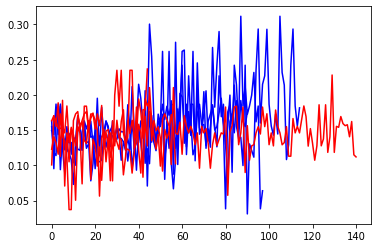

In [32]:
import matplotlib.pyplot as plt

for i in random.sample(range(len(voice_phishing_train_vanila_)), 3) :
  plt.plot(voice_phishing_train_vanila_[i], 'b-')

for i in random.sample(range(len(normal_train_vanila_)), 3) :
  plt.plot(normal_train_vanila_[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [33]:
voice_phishing_test_vanila_ = []
normal_test_vanila_ = []

for i in range(len(normal_test_token)) :
  normal_test_vanila_.append(detection_vanila(normal_test_token[i], keywords_vect, ko_model, 10))

for i in range(len(voice_phishing_test_token)) :
  voice_phishing_test_vanila_.append(detection_vanila(voice_phishing_test_token[i], keywords_vect, ko_model, 10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in float_scalars
  


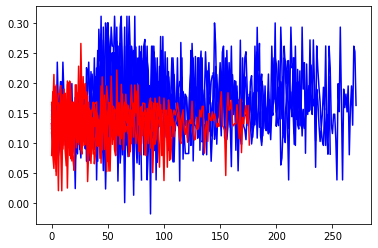

In [34]:
import matplotlib.pyplot as plt

for i in random.sample(range(len(voice_phishing_test_vanila_)), 10) :
  plt.plot(voice_phishing_test_vanila_[i], 'b-')

for i in random.sample(range(len(normal_test_vanila_)), 10) :
  plt.plot(normal_test_vanila_[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

##### 평균/분산분석 

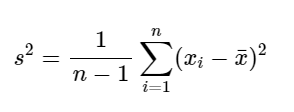

In [35]:
# train
voice_phishing_train_mean_lst = [sum(t)/len(t) for t in voice_phishing_train_vanila_]
normal_train_mean_lst = [sum(t)/len(t) for t in normal_train_vanila_]

voice_phishing_train_variance_lst = []
normal_train_variance_lst = []

for i in range(len(voice_phishing_train_vanila_)) :
  mean = voice_phishing_train_mean_lst[i]
  tmp = 0
  for j in range(len(voice_phishing_train_vanila_[i])) :
    tmp += (voice_phishing_train_vanila_[i][j] - mean) ** 2
  voice_phishing_train_variance_lst.append(tmp/(len(voice_phishing_train_vanila_[i])-1))

for i in range(len(normal_train_vanila_)) :
  mean = normal_train_mean_lst[i]
  tmp = 0
  for j in range(len(normal_train_vanila_[i])) :
    tmp += (normal_train_vanila_[i][j] - mean) ** 2
  normal_train_variance_lst.append(tmp/(len(normal_train_vanila_[i])-1))
  

In [36]:
print(len(voice_phishing_train_mean_lst))
print(len(normal_train_mean_lst))
print(len(voice_phishing_train_variance_lst))
print(len(normal_train_variance_lst))

850
850
850
850


In [37]:
print((voice_phishing_train_mean_lst))
print((normal_train_mean_lst))
print((voice_phishing_train_variance_lst))
print((normal_train_variance_lst))

[0.15891119120118308, 0.16905793700614344, 0.16616919637443936, 0.15483416656032017, 0.17364648143249206, 0.1659251335458591, 0.15390069134255874, 0.16524279134975947, 0.16957434276937172, 0.16510360522092002, 0.15653062433221818, 0.17320647795408337, 0.146910322726038, 0.16103716763984816, 0.15000729835781873, 0.1523235285274199, 0.15092118283718547, 0.15785686089222506, 0.1490481404689826, 0.16912549436491744, 0.15132888637235117, 0.14797182783120688, 0.1561030867778456, 0.16061451901513923, 0.16757689753554172, 0.14366086805811365, 0.1505535967576756, 0.1691715346944615, 0.16217980417819694, 0.15459423143431025, 0.15232808983490848, 0.15522488683880195, 0.14982084390749376, 0.16364801927817613, 0.16635619963083503, 0.15403010504229833, 0.14311122904372456, 0.1457266352650909, 0.15700471933598942, 0.1393380589931026, 0.15940764379471462, 0.15053358121133117, 0.1560748300994116, 0.15295193675274243, 0.15509878010195063, 0.16036590693001926, 0.16948079377753866, 0.16691213517544942, 0.

In [38]:
voice_phishing_train_mean = sum(voice_phishing_train_mean_lst)/len(voice_phishing_train_mean_lst)
normal_train_mean = sum(normal_train_mean_lst)/len(normal_train_mean_lst)
voice_phishing_train_variance = sum(voice_phishing_train_variance_lst)/len(voice_phishing_train_variance_lst)
normal_train_variance = sum(normal_train_variance_lst)/len(normal_train_variance_lst)

In [39]:
# mean의 차이는 0.02
print(voice_phishing_train_mean)
print(normal_train_mean)
print(voice_phishing_train_variance**(1/2))
print(normal_train_variance**(1/2))

0.15757596158380385
0.13543898058422385
0.050654819664597193
0.03404094583261686


In [40]:
# test
voice_phishing_test_mean_lst = [sum(t)/len(t) for t in voice_phishing_test_vanila_]
normal_test_mean_lst = [sum(t)/len(t) for t in normal_test_vanila_]

voice_phishing_test_variance_lst = []
normal_test_variance_lst = []

for i in range(len(voice_phishing_test_vanila_)) :
  mean = voice_phishing_test_mean_lst[i]
  tmp = 0
  for j in range(len(voice_phishing_test_vanila_[i])) :
    tmp += (voice_phishing_test_vanila_[i][j] - mean) ** 2
  voice_phishing_test_variance_lst.append(tmp/(len(voice_phishing_test_vanila_[i])-1))

for i in range(len(normal_test_vanila_)) :
  mean = normal_test_mean_lst[i]
  tmp = 0
  for j in range(len(normal_test_vanila_[i])) :
    tmp += (normal_test_vanila_[i][j] - mean) ** 2
  normal_test_variance_lst.append(tmp/(len(normal_test_vanila_[i])-1))
  

In [41]:
print(len(voice_phishing_test_mean_lst))
print(len(normal_test_mean_lst))
print(len(voice_phishing_test_variance_lst))
print(len(normal_test_variance_lst))

148
139
148
139


In [ ]:
print((voice_phishing_test_mean_lst))
print((normal_test_mean_lst))
print((voice_phishing_test_variance_lst))
print((normal_test_variance_lst))

[0.1519030463454354, 0.16390861878907645, 0.1675465761498488, 0.16443076850822905, 0.15956368889884195, 0.16481786650254898, 0.1624839638934108, 0.16698908102729293, 0.15224845765189318, 0.1665393443686272, 0.17063618253897664, 0.15928891519949104, 0.16957511960814622, 0.1607157343604048, 0.15878318506454314, 0.1734411876783107, 0.17325028428769135, 0.15785863857621374, 0.15441724655964223, 0.16611265913480663, 0.15288706271526792, 0.16295488367473618, 0.15014445924891584, 0.16106583430034896, 0.1528367876108019, 0.1696368551569913, 0.15031650359848148, 0.1547852462112438, 0.17135860466932365, 0.16273754014968525, 0.14651374671772296, 0.15064833247170117, 0.1661788045499972, 0.14826808123191004, 0.1564462124338827, 0.1586884777474234, 0.15708214860791517, 0.15983073926036082, 0.13939133994486044, 0.16244166478768657, 0.15845902131498316, 0.15666873247136492, 0.15444484226561056, 0.15628023196571655, 0.1565708369217376, 0.15383499555588404, 0.1609639129214619, 0.16141735325712467, 0.145

In [42]:
voice_phishing_test_mean = sum(voice_phishing_test_mean_lst)/len(voice_phishing_test_mean_lst)
normal_test_mean = sum(normal_test_mean_lst)/len(normal_test_mean_lst)
voice_phishing_test_variance = sum(voice_phishing_test_variance_lst)/len(voice_phishing_test_variance_lst)
normal_test_variance = sum(normal_test_variance_lst)/len(normal_test_variance_lst)

In [43]:
print(voice_phishing_test_mean)
print(normal_test_mean)
print(voice_phishing_test_variance**(1/2))
print(normal_test_variance**(1/2))

0.1590035064829458
0.13552756295181065
0.05136637844145062
0.03480069334868365


#### EWMA

In [44]:
def EWMA(target, keywords_vect, model, alpha) : 
  target_sim = []
  target_vect = []
  for i in range(len(target)) :
    target_vect.append(model[target[i]])

  for i in range(len(target_vect)) :
    tmp_sum = 0
    for j in range(len(keywords_vect)) :
      tmp_sum += cos_sim(target_vect[i], keywords_vect[j])
    if np.isnan(tmp_sum) :
      continue
    target_sim.append(tmp_sum / len(keywords_vect))
  
  ewma = [target_sim[0]]
  for i in range(1, len(target_sim)) :
    e = alpha * ewma[i-1] + (1-alpha) * target_sim[i]
    ewma.append(e)
  
  return ewma

##### alpha=0.9

In [49]:
def evaluate(voice_phishing, normal, threshold, count, start=50) :
  TP = 0
  TN = 0
  FP = 0
  FN = 0

  for i in range(len(voice_phishing)) :
    cnt = 0
    for j in range(start, len(voice_phishing[i])) :
      if voice_phishing[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      TP += 1
    else :
      FN += 1

  for i in range(len(normal)) :
    cnt = 0
    for j in range(start, len(normal[i])) :
      if normal[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      FP += 1
    else :
      TN += 1
  
  return {'Acc' : (TP + TN) / (TP + TN + FP + FN), 'Recall' : TP / (TP + FN), 'Precision' : TP / (TP + FP)}

In [ ]:
voice_phishing_train_EWMA_09 = []
normal_train_EWMA_09 = []

for i in range(len(normal_train_token)) :
  normal_train_EWMA_09.append(EWMA(normal_train_token[i], keywords_vect, ko_model, 0.9))

for i in range(len(voice_phishing_train_token)) :
  voice_phishing_train_EWMA_09.append(EWMA(voice_phishing_train_token[i], keywords_vect, ko_model, 0.9))

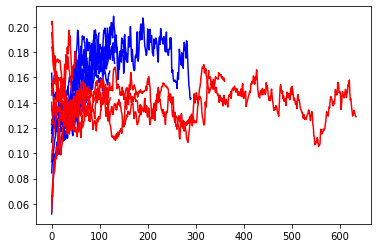

In [47]:
import matplotlib.pyplot as plt

for i in random.sample(range(len(voice_phishing_train_EWMA_09)), 10) :
  plt.plot(voice_phishing_train_EWMA_09[i], 'b-')

for i in random.sample(range(len(normal_train_EWMA_09)), 10) :
  plt.plot(normal_train_EWMA_09[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [ ]:
voice_phishing_test_EWMA_09 = []
normal_test_EWMA_09 = []

for i in range(len(normal_test_token)) :
  normal_test_EWMA_09.append(EWMA(normal_test_token[i], keywords_vect, ko_model, 0.9))

for i in range(len(voice_phishing_test_token)) :
  voice_phishing_test_EWMA_09.append(EWMA(voice_phishing_test_token[i], keywords_vect, ko_model, 0.9))

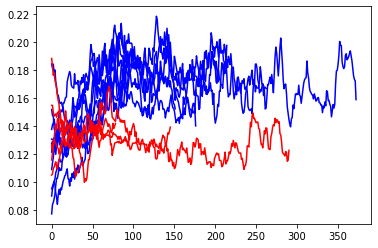

In [51]:
import matplotlib.pyplot as plt

for i in random.sample(range(len(voice_phishing_test_EWMA_09)), 10) :
  plt.plot(voice_phishing_test_EWMA_09[i], 'b-')

for i in random.sample(range(len(normal_test_EWMA_09)), 5) :
  plt.plot(normal_test_EWMA_09[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [59]:
evaluate(voice_phishing_train_EWMA_09, normal_train_EWMA_09, 0.17, 2, start=50)

{'Acc': 0.9405882352941176,
 'Recall': 0.9376470588235294,
 'Precision': 0.9431952662721893}

In [58]:
evaluate(voice_phishing_test_EWMA_09, normal_test_EWMA_09, 0.17, 2)

{'Acc': 0.926829268292683,
 'Recall': 0.9256756756756757,
 'Precision': 0.9319727891156463}

##### alpha=0.98

In [ ]:
voice_phishing_train_EWMA_098 = []
normal_train_EWMA_098 = []

for i in range(len(normal_train_token)) :
  normal_train_EWMA_098.append(EWMA(normal_train_token[i], keywords_vect, ko_model, 0.98))

for i in range(len(voice_phishing_train_token)) :
  voice_phishing_train_EWMA_098.append(EWMA(voice_phishing_train_token[i], keywords_vect, ko_model, 0.98))

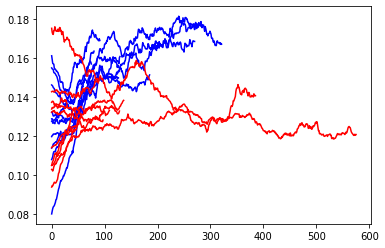

In [ ]:
import matplotlib.pyplot as plt

for i in random.sample(range(len(voice_phishing_train_EWMA_098)), 10) :
  plt.plot(voice_phishing_train_EWMA_098[i], 'b-')

for i in random.sample(range(len(normal_train_EWMA_098)), 10) :
  plt.plot(normal_train_EWMA_098[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [ ]:
voice_phishing_test_EWMA_098 = []
normal_test_EWMA_098 = []

for i in range(len(normal_test_token)) :
  normal_test_EWMA_098.append(EWMA(normal_test_token[i], keywords_vect, ko_model, 0.98))

for i in range(len(voice_phishing_test_token)) :
  voice_phishing_test_EWMA_098.append(EWMA(voice_phishing_test_token[i], keywords_vect, ko_model, 0.98))

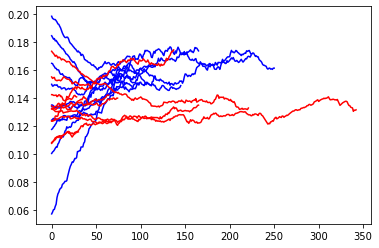

In [ ]:
import matplotlib.pyplot as plt

for i in random.sample(range(len(voice_phishing_test_EWMA_098)), 10) :
  plt.plot(voice_phishing_test_EWMA_098[i], 'b-')

for i in random.sample(range(len(normal_test_EWMA_098)), 10) :
  plt.plot(normal_test_EWMA_098[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

#### 변동분석하기

In [ ]:
def detection_wave(target, keywords_vect, model) :
  target_sim = []
  target_vect = []
  #keywords_vect = []
  for i in range(len(target)) :
    target_vect.append(model[target[i]])

  for i in range(len(target_vect)) :
    tmp_sum = 0
    for j in range(len(keywords_vect)) :
      tmp_sum += cos_sim(target_vect[i], keywords_vect[j])
    if np.isnan(tmp_sum) :
      continue
    target_sim.append(tmp_sum / len(keywords_vect))
  
  result = [0]
  for i in range(1, len(target_sim)) :
    result.append(abs(target_sim[i] - target_sim[i-1]))

  return result

In [ ]:
voice_phishing_train_wave_ = []
normal_train_wave_ = []

for i in range(len(normal_train_token)) :
  normal_train_wave_.append(detection_wave(normal_train_token[i], keywords_vect, ko_model))

for i in range(len(voice_phishing_train_token)) :
  voice_phishing_train_wave_.append(detection_wave(voice_phishing_train_token[i], keywords_vect, ko_model))

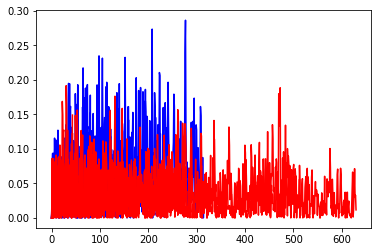

In [ ]:
import matplotlib.pyplot as plt

for i in random.sample(range(len(voice_phishing_train_wave_)), 10) :
  plt.plot(voice_phishing_train_wave_[i], 'b-')

for i in random.sample(range(len(normal_train_wave_)), 10) :
  plt.plot(normal_train_wave_[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [ ]:
voice_phishing_test_wave_ = []
normal_test_wave_ = []

for i in range(len(normal_test_token)) :
  normal_test_wave_.append(detection_wave(normal_test_token[i], keywords_vect, ko_model))

for i in range(len(voice_phishing_test_token)) :
  voice_phishing_test_wave_.append(detection_wave(voice_phishing_test_token[i], keywords_vect, ko_model))

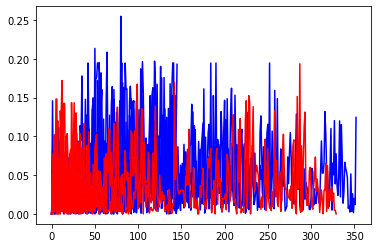

In [ ]:
import matplotlib.pyplot as plt

for i in random.sample(range(len(voice_phishing_test_wave_)), 10) :
  plt.plot(voice_phishing_test_wave_[i], 'b-')

for i in random.sample(range(len(normal_test_wave_)), 10) :
  plt.plot(normal_test_wave_[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

#### 변동 + EWMA값

In [ ]:
voice_phishing_train_EWMA_wave_ = []
normal_train_EWMA_wave_ = []
voice_phishing_test_EWMA_wave_ = []
normal_test_EWMA_wave_ = []

for i, j in zip(voice_phishing_train_wave_,voice_phishing_train_EWMA_09) :
  result = [p+q for p, q in zip(i, j)]
  voice_phishing_train_EWMA_wave_.append(result)

for i, j in zip(normal_train_wave_,normal_train_EWMA_09) :
  result = [p+q for p, q in zip(i, j)]
  normal_train_EWMA_wave_.append(result)

for i, j in zip(voice_phishing_test_wave_,voice_phishing_test_EWMA_09) :
  result = [p+q for p, q in zip(i, j)]
  voice_phishing_test_EWMA_wave_.append(result)

for i, j in zip(normal_test_wave_,normal_test_EWMA_09) :
  result = [p+q for p, q in zip(i, j)]
  normal_test_EWMA_wave_.append(result)

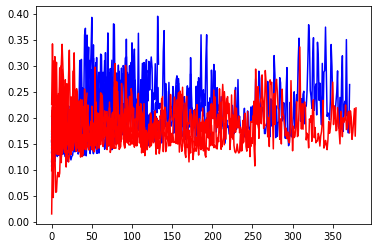

In [ ]:
import matplotlib.pyplot as plt

for i in random.sample(range(len(voice_phishing_train_EWMA_wave_)), 10) :
  plt.plot(voice_phishing_train_EWMA_wave_[i], 'b-')

for i in random.sample(range(len(normal_train_EWMA_wave_)), 10) :
  plt.plot(normal_train_EWMA_wave_[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

#### 편차분석하기 (mean : 0.135 사용)

In [60]:
def detection_deviation(target, keywords_vect, model, mean=0.135) :
  target_sim = []
  target_vect = []
  #keywords_vect = []
  for i in range(len(target)) :
    target_vect.append(model[target[i]])

  for i in range(len(target_vect)) :
    tmp_sum = 0
    for j in range(len(keywords_vect)) :
      tmp_sum += cos_sim(target_vect[i], keywords_vect[j])
    if np.isnan(tmp_sum) :
      continue
    target_sim.append(tmp_sum / len(keywords_vect))
  
  result = []
  for i in range(len(target_sim)) :
    r = max(0, target_sim[i] - mean)
    if r != 0 :
      result.append(r)
    else :
      if i == 0 :
        result.append(0)
      else :
        result.append(result[i-1])

  return result

In [61]:
voice_phishing_train_deviation_ = []
normal_train_deviation_ = []

for i in range(len(normal_train_token)) :
  normal_train_deviation_.append(detection_deviation(normal_train_token[i], keywords_vect, ko_model))

for i in range(len(voice_phishing_train_token)) :
  voice_phishing_train_deviation_.append(detection_deviation(voice_phishing_train_token[i], keywords_vect, ko_model))

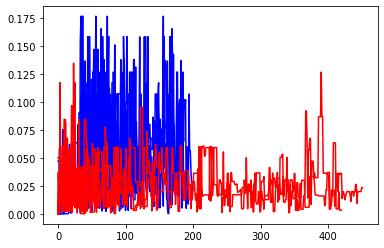

In [62]:
import matplotlib.pyplot as plt

for i in random.sample(range(len(voice_phishing_train_deviation_)), 10) :
  plt.plot(voice_phishing_train_deviation_[i], 'b-')

for i in random.sample(range(len(normal_train_deviation_)), 10) :
  plt.plot(normal_train_deviation_[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [ ]:
voice_phishing_test_deviation_ = []
normal_test_deviation_ = []

for i in range(len(normal_test_token)) :
  normal_test_deviation_.append(detection_deviation(normal_test_token[i], keywords_vect, ko_model))

for i in range(len(voice_phishing_test_token)) :
  voice_phishing_test_deviation_.append(detection_deviation(voice_phishing_test_token[i], keywords_vect, ko_model))

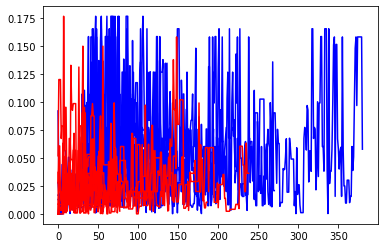

In [74]:
import matplotlib.pyplot as plt

for i in random.sample(range(len(voice_phishing_test_deviation_)), 10) :
  plt.plot(voice_phishing_test_deviation_[i], 'b-')

for i in random.sample(range(len(normal_test_deviation_)), 10) :
  plt.plot(normal_test_deviation_[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [69]:
evaluate(voice_phishing_train_deviation_, normal_train_deviation_, 0.1, 2, start=50)

{'Acc': 0.9176470588235294,
 'Recall': 0.9352941176470588,
 'Precision': 0.9034090909090909}

In [70]:
evaluate(voice_phishing_test_deviation_, normal_test_deviation_, 0.1, 2, start=50)

{'Acc': 0.9303135888501742,
 'Recall': 0.9594594594594594,
 'Precision': 0.9102564102564102}

##### 편차의 평균, sigma 분석

In [75]:
# train
voice_phishing_train_mean_lst = [sum(t)/len(t) for t in voice_phishing_train_deviation_]
normal_train_mean_lst = [sum(t)/len(t) for t in normal_train_deviation_]

voice_phishing_train_variance_lst = []
normal_train_variance_lst = []

for i in range(len(voice_phishing_train_deviation_)) :
  mean = voice_phishing_train_mean_lst[i]
  tmp = 0
  for j in range(len(voice_phishing_train_deviation_[i])) :
    tmp += (voice_phishing_train_deviation_[i][j] - mean) ** 2
  voice_phishing_train_variance_lst.append(tmp/(len(voice_phishing_train_deviation_[i])-1))

for i in range(len(normal_train_deviation_)) :
  mean = normal_train_mean_lst[i]
  tmp = 0
  for j in range(len(normal_train_deviation_[i])) :
    tmp += (normal_train_deviation_[i][j] - mean) ** 2
  normal_train_variance_lst.append(tmp/(len(normal_train_deviation_[i])-1))
  

In [76]:
print(len(voice_phishing_train_mean_lst))
print(len(normal_train_mean_lst))
print(len(voice_phishing_train_variance_lst))
print(len(normal_train_variance_lst))

850
850
850
850


In [77]:
print((voice_phishing_train_mean_lst))
print((normal_train_mean_lst))
print((voice_phishing_train_variance_lst))
print((normal_train_variance_lst))

[0.04531397496583812, 0.04964947036180781, 0.04979375977609507, 0.044919947704710736, 0.059905681644030886, 0.051356590428723176, 0.0348509611140939, 0.05245847853138928, 0.057921346523184994, 0.053909544954518565, 0.041241894271540076, 0.05456453524380138, 0.038705898214457975, 0.04584230931794778, 0.03594902664037896, 0.04106110419065067, 0.044573443901424356, 0.04705313995642303, 0.038801386913072146, 0.051575143638529025, 0.034657591356366924, 0.03217165095027196, 0.04225048946430815, 0.04536387230534101, 0.05619507934310047, 0.028281395536617182, 0.0362534360315935, 0.056352689509314, 0.04818365133067322, 0.0371125002732703, 0.03387481927660926, 0.041943429498231766, 0.03610608743185434, 0.05099698225879282, 0.05448911145905721, 0.03516347922498734, 0.039928006045943445, 0.030432780718086604, 0.049270429255741204, 0.03471357422721459, 0.047384383115489426, 0.04357263148109388, 0.039153742681196584, 0.04144361311276624, 0.04679070924162233, 0.04386029824690164, 0.054753136160922714

In [78]:
voice_phishing_train_mean = sum(voice_phishing_train_mean_lst)/len(voice_phishing_train_mean_lst)
normal_train_mean = sum(normal_train_mean_lst)/len(normal_train_mean_lst)
voice_phishing_train_variance = sum(voice_phishing_train_variance_lst)/len(voice_phishing_train_variance_lst)
normal_train_variance = sum(normal_train_variance_lst)/len(normal_train_variance_lst)

In [79]:
# mean의 차이는 0.02
# variance의 차이는 약 2배
print(voice_phishing_train_mean)
print(normal_train_mean)
print(voice_phishing_train_variance**(1/2))
print(normal_train_variance**(1/2))

0.04550432845690231
0.026224377626075705
0.03967264268105241
0.020576391941887325


In [80]:
# test
voice_phishing_test_mean_lst = [sum(t)/len(t) for t in voice_phishing_test_deviation_]
normal_test_mean_lst = [sum(t)/len(t) for t in normal_test_deviation_]

voice_phishing_test_variance_lst = []
normal_test_variance_lst = []

for i in range(len(voice_phishing_test_deviation_)) :
  mean = voice_phishing_test_mean_lst[i]
  tmp = 0
  for j in range(len(voice_phishing_test_deviation_[i])) :
    tmp += (voice_phishing_test_deviation_[i][j] - mean) ** 2
  voice_phishing_test_variance_lst.append(tmp/(len(voice_phishing_test_deviation_[i])-1))

for i in range(len(normal_test_deviation_)) :
  mean = normal_test_mean_lst[i]
  tmp = 0
  for j in range(len(normal_test_deviation_[i])) :
    tmp += (normal_test_deviation_[i][j] - mean) ** 2
  normal_test_variance_lst.append(tmp/(len(normal_test_deviation_[i])-1))
  

In [81]:
print(len(voice_phishing_test_mean_lst))
print(len(normal_test_mean_lst))
print(len(voice_phishing_test_variance_lst))
print(len(normal_test_variance_lst))

148
139
148
139


In [82]:
print((voice_phishing_test_mean_lst))
print((normal_test_mean_lst))
print((voice_phishing_test_variance_lst))
print((normal_test_variance_lst))

[0.05679694161045221, 0.04459541170901453, 0.03497664215950874, 0.05503575293348781, 0.051872695499757794, 0.048389567430124736, 0.039508042692218914, 0.058481351701483865, 0.06024303565537785, 0.044523463715576674, 0.05426870421017677, 0.05376263411621178, 0.036526034785580114, 0.03483759206461352, 0.043252957561118896, 0.04504402666185715, 0.045974358196948256, 0.045883134964279905, 0.049511315561564254, 0.052290923927308296, 0.04505431116917055, 0.04462413118491205, 0.0566978772032887, 0.053467498951747974, 0.04366617213061381, 0.04035066580995109, 0.048744492188009726, 0.05077343649297709, 0.05061930669502642, 0.043968375223306023, 0.04191547213854925, 0.04141271441606193, 0.042172412631433454, 0.0559387482013218, 0.04302337100401007, 0.043102568378867244, 0.04294185020853887, 0.05054604147098553, 0.04535619775614135, 0.04542470448039675, 0.050825531511364076, 0.053022455646014426, 0.029831518698805435, 0.03572485719100662, 0.02797761449395444, 0.050424442826483735, 0.0489927462622

In [83]:
voice_phishing_test_mean = sum(voice_phishing_test_mean_lst)/len(voice_phishing_test_mean_lst)
normal_test_mean = sum(normal_test_mean_lst)/len(normal_test_mean_lst)
voice_phishing_test_variance = sum(voice_phishing_test_variance_lst)/len(voice_phishing_test_variance_lst)
normal_test_variance = sum(normal_test_variance_lst)/len(normal_test_variance_lst)

In [84]:
print(voice_phishing_test_mean)
print(normal_test_mean)
print(voice_phishing_test_variance**(1/2))
print(normal_test_variance**(1/2))

0.04702779628835345
0.026785066378138576
0.03981622770791327
0.020927856883696715


##### 편차를 EWMA

In [85]:
def EWMA_only(target, alpha) : 
  ewma = [target[0]]
  for i in range(1, len(target)) :
    e = alpha * ewma[i-1] + (1-alpha) * target[i]
    ewma.append(e)
  
  return ewma

In [86]:
voice_phishing_train_deviation_ewma = [EWMA_only(t, 0.9) for t in voice_phishing_train_deviation_]
normal_train_deviation_ewma = [EWMA_only(t, 0.9) for t in normal_train_deviation_]

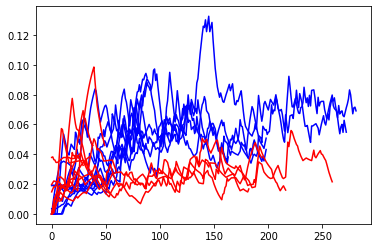

In [87]:
import matplotlib.pyplot as plt

for i in random.sample(range(len(voice_phishing_train_deviation_ewma)), 10) :
  plt.plot(voice_phishing_train_deviation_ewma[i], 'b-')

for i in random.sample(range(len(normal_train_deviation_ewma)), 10) :
  plt.plot(normal_train_deviation_ewma[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [88]:
voice_phishing_test_deviation_ewma = [EWMA_only(t, 0.9) for t in voice_phishing_test_deviation_]
normal_test_deviation_ewma = [EWMA_only(t, 0.9) for t in normal_test_deviation_]

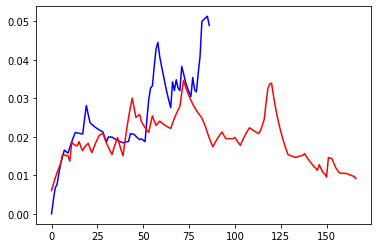

In [91]:
import matplotlib.pyplot as plt

for i in random.sample(range(len(voice_phishing_test_deviation_ewma)), 1) :
  plt.plot(voice_phishing_test_deviation_ewma[i], 'b-')

for i in random.sample(range(len(normal_test_deviation_ewma)), 1) :
  plt.plot(normal_test_deviation_ewma[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [ ]:
evaluate(voice_phishing_train_deviation_ewma, normal_train_deviation_ewma, 0.04, 1)

{'Acc': 0.7397435897435898, 'Recall': 1.0, 'Precision': 0.657672849915683}

#### 편차 + EWMA값

In [92]:
def evaluate(voice_phishing, normal, threshold, count, start=50) :
  TP = 0
  TN = 0
  FP = 0
  FN = 0

  for i in range(len(voice_phishing)) :
    cnt = 0
    for j in range(start, len(voice_phishing[i])) :
      if voice_phishing[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      TP += 1
    else :
      FN += 1

  for i in range(len(normal)) :
    cnt = 0
    for j in range(start, len(normal[i])) :
      if normal[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      FP += 1
    else :
      TN += 1
  
  return {'Acc' : (TP + TN) / (TP + TN + FP + FN), 'Recall' : TP / (TP + FN), 'Precision' : TP / (TP + FP)}

In [115]:
voice_phishing_train_EWMA_deviation_ = []
normal_train_EWMA_deviation_ = []
voice_phishing_test_EWMA_deviation_ = []
normal_test_EWMA_deviation_ = []

for i, j in zip(voice_phishing_train_deviation_,voice_phishing_train_EWMA_09) :
  result = [2*p+q for p, q in zip(i, j)]
  voice_phishing_train_EWMA_deviation_.append(result)

for i, j in zip(normal_train_deviation_,normal_train_EWMA_09) :
  result = [2*p+q for p, q in zip(i, j)]
  normal_train_EWMA_deviation_.append(result)

for i, j in zip(voice_phishing_test_deviation_,voice_phishing_test_EWMA_09) :
  result = [2*p+q for p, q in zip(i, j)]
  voice_phishing_test_EWMA_deviation_.append(result)

for i, j in zip(normal_test_deviation_,normal_test_EWMA_09) :
  result = [2*p+q for p, q in zip(i, j)]
  normal_test_EWMA_deviation_.append(result)

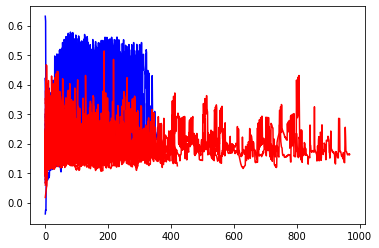

In [116]:
import matplotlib.pyplot as plt

for i in random.sample(range(len(voice_phishing_train_EWMA_deviation_)), 100) :
  plt.plot(voice_phishing_train_EWMA_deviation_[i], 'b-')

for i in random.sample(range(len(normal_train_EWMA_deviation_)), 100) :
  plt.plot(normal_train_EWMA_deviation_[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [122]:
evaluate(voice_phishing_train_EWMA_deviation_, normal_train_EWMA_deviation_, threshold=0.35, count=2)

{'Acc': 0.9194117647058824,
 'Recall': 0.9529411764705882,
 'Precision': 0.8930540242557883}

In [123]:
evaluate(voice_phishing_test_EWMA_deviation_, normal_test_EWMA_deviation_, threshold=0.35, count=2)

{'Acc': 0.9372822299651568,
 'Recall': 0.972972972972973,
 'Precision': 0.9113924050632911}

#### 편차의EWMA + EWMA

In [124]:
def evaluate(voice_phishing, normal, threshold, count, start=50) :
  TP = 0
  TN = 0
  FP = 0
  FN = 0

  for i in range(len(voice_phishing)) :
    cnt = 0
    for j in range(start, len(voice_phishing[i])) :
      if voice_phishing[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      TP += 1
    else :
      FN += 1

  for i in range(len(normal)) :
    cnt = 0
    for j in range(start, len(normal[i])) :
      if normal[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      FP += 1
    else :
      TN += 1
  
  return {'Acc' : (TP + TN) / (TP + TN + FP + FN), 'Recall' : TP / (TP + FN), 'Precision' : TP / (TP + FP)}

In [161]:
voice_phishing_train_EWMA_deviation_EWMA = []
normal_train_EWMA_deviation_EWMA = []
voice_phishing_test_EWMA_deviation_EWMA = []
normal_test_EWMA_deviation_EWMA = []

for i, j in zip(voice_phishing_train_deviation_ewma,voice_phishing_train_EWMA_09) :
  result = [2*p+q*3 for p, q in zip(i, j)]
  voice_phishing_train_EWMA_deviation_EWMA.append(result)

for i, j in zip(normal_train_deviation_ewma,normal_train_EWMA_09) :
  result = [2*p+q*3 for p, q in zip(i, j)]
  normal_train_EWMA_deviation_EWMA.append(result)

for i, j in zip(voice_phishing_test_deviation_ewma,voice_phishing_test_EWMA_09) :
  result = [2*p+q*3 for p, q in zip(i, j)]
  voice_phishing_test_EWMA_deviation_EWMA.append(result)

for i, j in zip(normal_test_deviation_ewma,normal_test_EWMA_09) :
  result = [2*p+q*3 for p, q in zip(i, j)]
  normal_test_EWMA_deviation_EWMA.append(result)

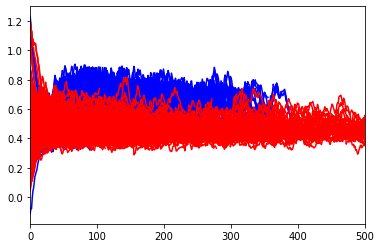

In [175]:
import matplotlib.pyplot as plt

for i in (range(len(voice_phishing_train_EWMA_deviation_EWMA))) :
  plt.plot(voice_phishing_train_EWMA_deviation_EWMA[i], 'b-')
  plt.xlim([0,500])

for i in (range(len(normal_train_EWMA_deviation_EWMA))) :
  plt.plot(normal_train_EWMA_deviation_EWMA[i], 'r-')
  plt.xlim([0,500])


#plt.legend(['Normal', 'Voice Phishing'])

In [169]:
evaluate(voice_phishing_train_EWMA_deviation_EWMA, normal_train_EWMA_deviation_EWMA, threshold=0.62, count=2, start=50)

{'Acc': 0.941764705882353,
 'Recall': 0.9364705882352942,
 'Precision': 0.9464922711058263}

In [170]:
evaluate(voice_phishing_test_EWMA_deviation_EWMA, normal_test_EWMA_deviation_EWMA, threshold=0.62, count=2, start=50)

{'Acc': 0.9442508710801394, 'Recall': 0.9527027027027027, 'Precision': 0.94}